# Algorithme Non Supervisé

### Ajout des bibliothèques

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap



### Importation CSV file

We don't use the id et time_active column.

In [10]:
# Importation CSV file
df = pd.read_csv('data/users.csv')

# Suppression de 'user_id' et 'time_active'
X = df.drop(columns=['user_id', 'time_active'])

# Vérifie si c'est bon
print("Colonnes conservées :", X.columns.tolist())

Colonnes conservées : ['n_tweets', 'n_replies', 'n_quotes', 'n_retweets', 'max_followers', 'n_mentions', 'n_hashtags', 'n_urls', 'n_out_urls', 'f_tweets', 'f_friends']


### Standardisation des données

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMeans clustering

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)


### Evaluation du nombre de clusers 



In [13]:

# Sous-échantillonnage
from sklearn.utils import resample
X_sample = resample(X_scaled, n_samples=10000) if X_scaled.shape[0] > 2000 else X_scaled

# Test des k
for k in range(2, 13):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X_sample)
    score = silhouette_score(X_sample, km.labels_)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.986
k=3, silhouette=0.907
k=4, silhouette=0.895
k=5, silhouette=0.899
k=6, silhouette=0.833
k=7, silhouette=0.824
k=8, silhouette=0.832
k=9, silhouette=0.824
k=10, silhouette=0.675
k=11, silhouette=0.681
k=12, silhouette=0.437


Problem : a lot of k are good enough for a non supervised algorithm.

##  KMeans tests

## def of a function

In [14]:
def algoKmeans(k):

    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    clusters = kmeans.labels_
    centers = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    print("🔹 Labels (attribution des clusters) :")
    print(clusters)

    print("\n🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :")
    print(centers)

    print(f"\n🔹 Inertie (somme des distances intra-cluster) : {inertia:.2f}")

    # Réduction de dimension à 2 composantes
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)
    print("Somme :", sum(pca.explained_variance_ratio_))
    
    # Ajout des clusters au DataFrame pour visualisation
    df_visu = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_visu['cluster'] = clusters
    df_visu['user_id'] = df['user_id'].values  # si tu as conservé user_id dans df original

    # Affichage graphique
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_visu, x='PC1', y='PC2', hue='cluster', palette='Set1', s=60)

    plt.title("Représentation des clusters KMeans en 2D (ACP)")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    #Visualisation avec UMAP (pas fonctionnel)
    
    # reducer = umap.UMAP(n_components=2, random_state=42)
    #X_umap = reducer.fit_transform(X_scaled)

    # sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='Set2')
    # plt.title("UMAP des utilisateurs avec KMeans")
    # plt.show()

### Kmeans = 2

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-7.33102888e-04 -6.99179843e-05 -1.11438189e-03 -5.85142807e-04
  -4.10194638e-06 -5.67441293e-04 -7.71957800e-04 -7.19559722e-04
  -1.92699599e-04  4.01534912e-12 -6.86990721e-05]
 [ 4.50476085e+02  4.29631097e+01  6.84763899e+02  3.59557772e+02
   2.52055854e+00  3.48680569e+02  4.74351600e+02  4.42154099e+02
   1.18409793e+02 -2.46792530e-06  4.22141142e+01]]

🔹 Inertie (somme des distances intra-cluster) : 16195257.32
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930390696418


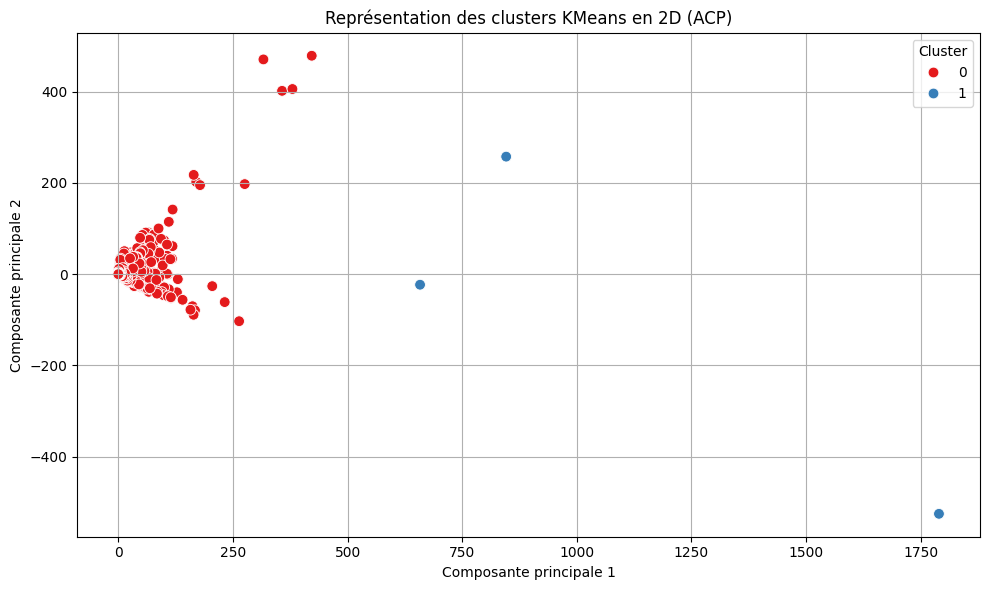

In [15]:
algoKmeans(2)

### Kmeans = 3

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-1.92176573e-02 -8.24588002e-03 -5.46945928e-03 -1.40028425e-02
  -3.09924241e-03 -1.54639794e-02 -1.57231697e-02 -1.36753943e-02
  -1.16155534e-02 -2.21403545e-06 -1.19019873e-04]
 [ 1.26386921e+01  5.59051443e+00  2.97681376e+00  9.17421065e+00
   2.11640052e+00  1.01854330e+01  1.02226135e+01  8.85826068e+00
   7.81056121e+00  1.51392268e-03  3.43398123e-02]
 [ 4.50476085e+02  4.29631097e+01  6.84763899e+02  3.59557772e+02
   2.52055854e+00  3.48680569e+02  4.74351600e+02  4.42154099e+02
   1.18409793e+02 -2.46792530e-06  4.22141142e+01]]

🔹 Inertie (somme des distances intra-cluster) : 14479841.78
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930390696418


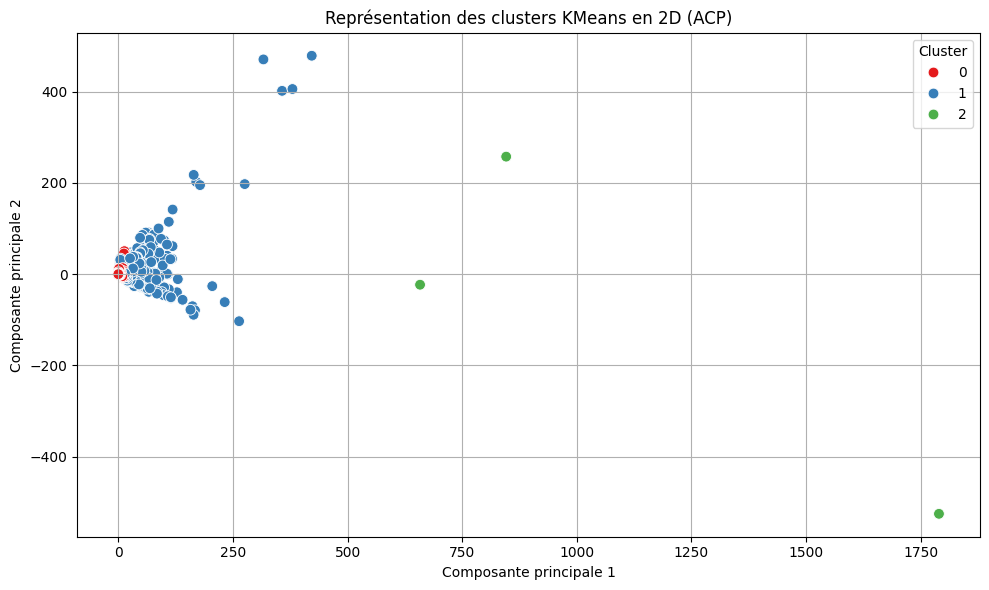

In [16]:
algoKmeans(3)

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.31620281e-02 -8.94172590e-03 -6.45620678e-03 -1.73462021e-02
  -5.35032383e-03 -1.88392460e-02 -1.87531604e-02 -1.51431811e-02
  -1.27254238e-02  1.56253957e-06 -1.40468621e-04]
 [ 1.04947407e+01  3.78262575e+00  2.53263954e+00  7.99578369e+00
   2.54520541e+00  8.63040926e+00  8.42441811e+00  6.37046890e+00
   5.42781984e+00 -7.36369660e-04  3.39180031e-02]
 [ 9.86337715e+01  2.16781796e+02  7.06343135e+00 -1.03442861e-01
   2.55402378e+00  4.14061951e+01  7.37722211e+01  2.45747686e+02
   2.65553837e+02 -4.36940354e-03  1.21497409e-01]
 [ 4.50476085e+02  4.29631097e+01  6.84763899e+02  3.59557772e+02
   2.52055854e+00  3.48680569e+02  4.74351600e+02  4.42154099e+02
   1.18409793e+02 -2.46792530e-06  4.22141142e+01]]

🔹 Inertie (somme des distances intra-cluster) : 13025575.70
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930

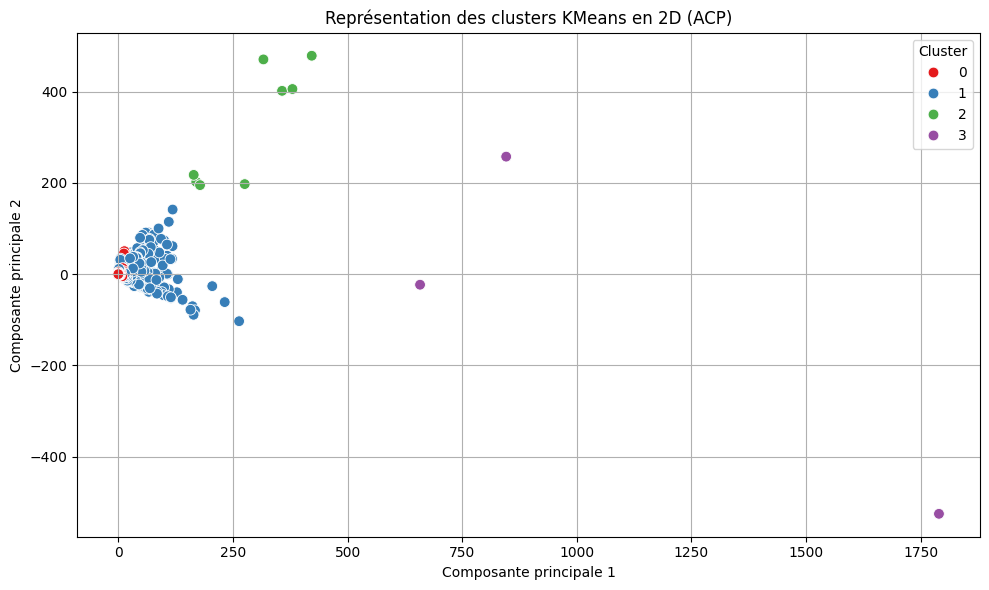

In [17]:
algoKmeans(4)

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.09161472e-02 -8.57806429e-03 -5.94473450e-03 -1.54065111e-02
  -1.10465775e-03 -1.68736185e-02 -1.70145988e-02 -1.42729561e-02
  -1.19643231e-02 -3.19129520e-06 -1.68988383e-03]
 [ 1.17695699e+01  5.01666044e+00  2.84740364e+00  8.73907713e+00
   6.48619289e-01  9.61441767e+00  9.48110341e+00  7.62657950e+00
   6.41450640e+00  5.07589046e-04  3.31885005e-02]
 [ 2.25640796e-03 -4.10130069e-02 -7.81520157e-02  5.61670113e-03
   1.79872709e-01 -3.03124331e-02 -4.19760302e-03  3.28658527e-02
  -5.87964561e-02  7.16889301e-01  4.79806499e+02]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 1.97954980e+02  2.59106079e+01  2.55191695e+02  1.88419250e+01
   1.50286560e+00  2.48715370e+01  2.49840467e+02  4.04810208e+02
   3.3

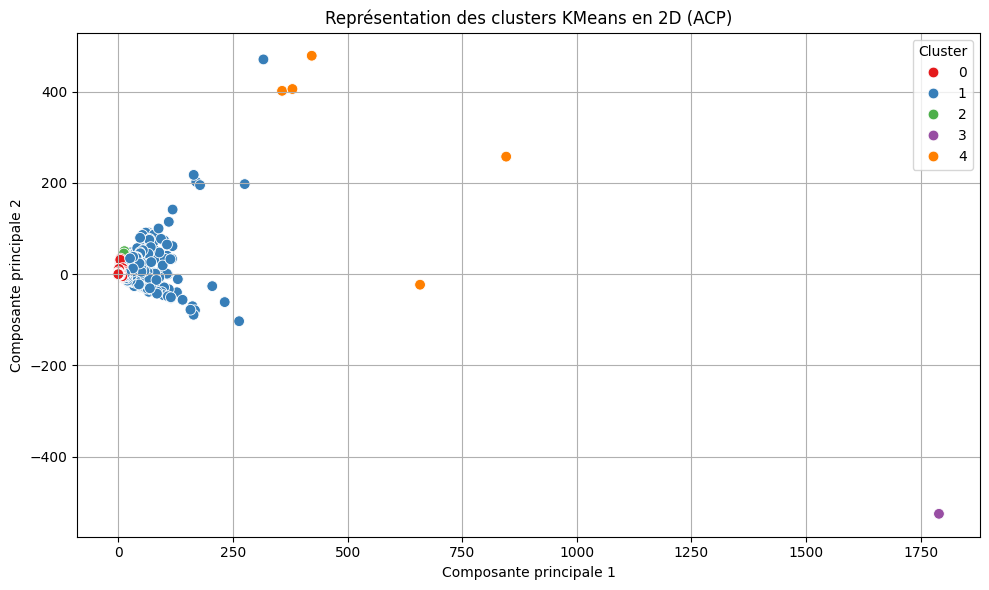

In [18]:
algoKmeans(5)

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.09161472e-02 -8.57806429e-03 -5.94473450e-03 -1.54065111e-02
  -1.10465775e-03 -1.68736185e-02 -1.70145988e-02 -1.42729561e-02
  -1.19643231e-02 -3.19129520e-06 -1.68988383e-03]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 2.90966573e+02  6.44651711e+01  6.38198730e+02  4.74407861e+01
   3.79388077e+00  6.20968274e+01  4.75343722e+02  4.43329213e+02
   1.21278103e+01 -2.17158266e-03  6.33261669e+01]
 [ 1.35947251e+02  2.07565737e-01 -1.46329422e-01 -2.23982376e-01
  -2.44778439e-02  5.46768143e-02  9.95049635e+01  3.79130872e+02
   5.47821499e+02 -4.18470612e-03  2.80236255e-01]
 [ 1.17695699e+01  5.01666044e+00  2.84740364e+00  8.73907713e+00
   6.48619289e-01  9.61441767e+00  9.48110341e+00  7.62657950e+00
   6.4

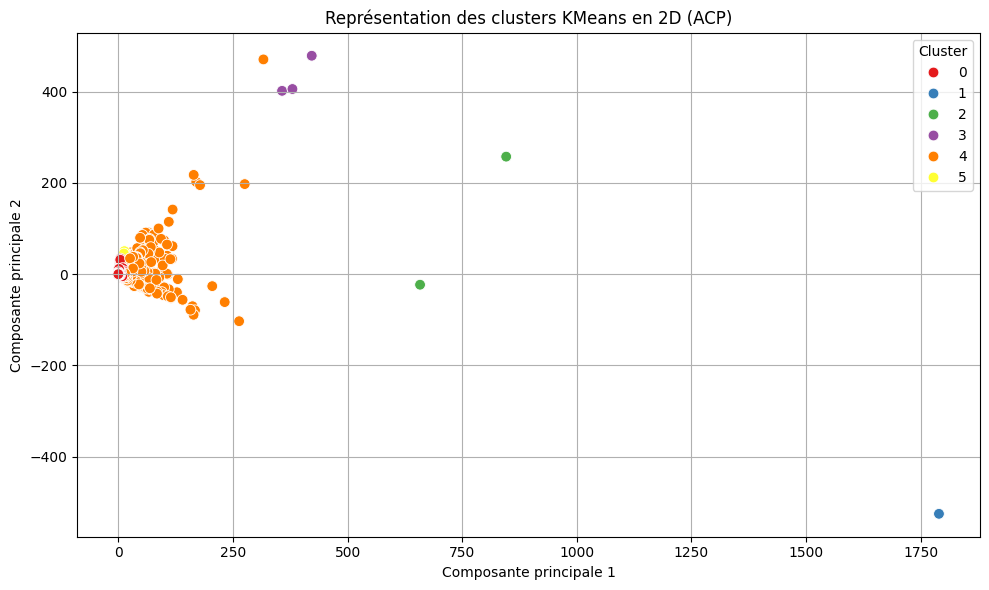

In [19]:
algoKmeans(6)